In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm #progress bar
import rdkit
from rdkit import Chem #Chemistry
from rdkit.Chem import rdMolDescriptors #molecular descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
rdkit.__version__


/Users/NathanJiang/opt/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'2023.03.2'

In [31]:
import xgboost
import sklearn
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #ML training
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error #ML stats
#from yellowbrick.regressor import prediction_error, ResidualsPlot
from tdc.single_pred import ADME
from tdc.benchmark_group import admet_group
from tdc import BenchmarkGroup
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_rdkit(smiles_string):
    mol = Chem.MolFromSmiles(smiles_string)
    chosen_descriptors = ['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed']
    mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
    return list(mol_descriptor_calculator.CalcDescriptors(mol))
    

In [44]:
group = admet_group(path = 'data/')
predictions_list_xgb = []
best_params_list_xgb = []
predictions_list_rf = []
predictions_list_svm = []
best_params_list_svm = []
predictions_list_adb = []
predictions_list_cnn = []

for seed in [1, 2, 3, 4, 5]:
    predictions_xgb = {}
    predictions_rf = {}
    predictions_svm = {}
    predictions_adb = {}
    predictions_cnn = {}

    benchmark = group.get('Caco2_Wang')
    name = benchmark['name']
    train_val, test = benchmark['train_val'], benchmark['test']
    train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default', seed = seed)
    
    nBits=200
    rdkit_des = [get_rdkit(smile) for smile in train['Drug']]
    rdkit_name = [f'Bit_{i}' for i in range(nBits)]
    rdkit_bits = [list(l) for l in rdkit_des]
    Y = train['Y']
    train = pd.DataFrame(rdkit_bits, index = train.Drug, columns=rdkit_name).reset_index(drop = False)
    train['Y'] = Y
    train = train.dropna(axis=0)
    
    rdkit_des = [get_rdkit(smile) for smile in test['Drug']]
    rdkit_bits = [list(l) for l in rdkit_des]
    Y = test['Y']
    test = pd.DataFrame(rdkit_bits, index = test.Drug, columns=rdkit_name).reset_index(drop = False)
    test['Y'] = Y
    test = test.dropna(axis=0)

    train_X = train.drop(columns = ["Drug","Y"])
    train_y = train.Y
    test_X = test.drop(columns = ["Drug","Y"])
    test_y = test.Y

    
    #XGBoost + RDKit
    xgb_parameters = {'objective':['reg:squarederror'],
            'booster':['gbtree','gblinear'],
            'learning_rate': [0.1],
            'max_depth': [7,10,15,20],
            'min_child_weight': [10,15,20,25],
            'colsample_bytree': [0.8, 0.9, 1],
            'n_estimators': [300,400,500,600],
            "reg_alpha"   : [0.5,0.2,1],
            "reg_lambda"  : [2,3,5],
            "gamma"       : [1,2,3]}

    xgb_model = XGBRegressor()
    grid_obj_xgb = RandomizedSearchCV(xgb_model, xgb_parameters, cv=5, n_iter=15, scoring='neg_mean_absolute_error', verbose=5, n_jobs=1)
    grid_obj_xgb.fit(train_X, train_y, verbose = 1)
    y_pred_test_xgb = grid_obj_xgb.predict(test_X)
    bp_xgb = grid_obj_xgb.best_params_
    predictions_xgb[name] = y_pred_test_xgb
    predictions_list_xgb.append(predictions_xgb)
    best_params_list_xgb.append(bp_xgb)

    #Random Forest + RDKit
    rf_model = RandomForestRegressor()
    rf_model.fit(train_X, train_y)
    y_pred_test_rf = rf_model.predict(test_X)
    predictions_rf[name] = y_pred_test_rf
    predictions_list_rf.append(predictions_rf)

    #SVM + RDKit
    svm_parameters = {
        'C': [0.1, 1, 10, 100, 1000],
        'epsilon': [0.0001, 0.001, 0.01, 0.1, 0.5],
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
    }
    svm_model = SVR(kernel="rbf")
    grid_obj_svm = RandomizedSearchCV(svm_model, svm_parameters, cv=5, n_iter=15, scoring='neg_mean_absolute_error', verbose=5, n_jobs=1)
    grid_obj_svm.fit(train_X, train_y)
    y_pred_test_svm = grid_obj_svm.predict(test_X)
    bp_svm = grid_obj_svm.best_params_
    predictions_svm[name] = y_pred_test_svm
    predictions_list_svm.append(predictions_svm)
    best_params_list_svm.append(bp_svm)

    # AdaBoost + RDKit
    DTR = DecisionTreeRegressor(max_depth=4)
    adb_model = AdaBoostRegressor(n_estimators=300, base_estimator=DTR, learning_rate=1)
    adb_model.fit(train_X, train_y)
    y_pred_test_adb = adb_model.predict(test_X)
    predictions_adb[name] = y_pred_test_adb
    predictions_list_adb.append(predictions_adb)
    

    #CNN + RDKit
    train_X = train_X.to_numpy()
    test_X = test_X.to_numpy()
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
    cnn_model = Sequential()
    cnn_model.add(Conv1D(32, 2, activation="relu", input_shape=(200,1)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation="relu"))
    cnn_model.add(Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01,clipnorm=2)
    cnn_model.compile(loss="mse", optimizer=opt)
    cnn_model.fit(train_X, train_y, batch_size=12, epochs=10, verbose=0)
    y_pred_test_cnn = cnn_model.predict(test_X)
    predictions_cnn[name] = y_pred_test_cnn
    predictions_list_cnn.append(predictions_cnn)

#xgb_results = group.evaluate_many(predictions_list_xgb)
#rf_results = group.evaluate_many(predictions_list_rf)
#svm_results = group.evaluate_many(predictions_list_svm)
#adb_results = group.evaluate_many(predictions_list_adb)
cnn_results = group.evaluate_many(predictions_list_cnn)


Found local copy...
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 1591.33it/s]


6/6 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2040.62it/s]


6/6 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2027.47it/s]


6/6 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2020.88it/s]


6/6 [==============================] - 0s 2ms/step


generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 1908.47it/s]


6/6 [==============================] - 0s 2ms/step


In [35]:
xgb_results

{'caco2_wang': [0.284, 0.009]}

In [6]:
rf_results

{'caco2_wang': [0.306, 0.008]}

In [7]:
svm_results

{'caco2_wang': [0.551, 0.009]}

In [8]:
adb_results

{'caco2_wang': [0.297, 0.003]}

In [45]:
cnn_results

{'caco2_wang': [1.199, 1.221]}

In [64]:
predictions_list_cnn = [{'caco2_wang': np.array([-5.748745 ,
         -5.1111298,
         -4.538036 ,
         -5.5317945,
         -5.1587124,
         -5.1553917,
         -5.1641665,
         -5.151903 ,
         -5.133114 ,
         -5.1562624,
         -5.417289 ,
         -4.893112 ,
         -4.862411 ,
         -5.450316 ,
         -5.4559603,
         -5.1806164,
         -5.9459887,
         -6.2686243,
         -6.0407567,
         -6.0407567,
         -5.7579174,
         -5.7579174,
         -5.9654593,
         -4.7767124,
         -5.107748 ,
         -5.2222238,
         -5.476756 ,
         -5.135504 ,
         -5.019289 ,
         -6.735765 ,
         -6.337099 ,
         -6.4672337,
         -4.3668756,
         -6.6903067,
         -6.200511 ,
         -5.667556 ,
         -6.200511 ,
         -5.782684 ,
         -5.6713724,
         -5.571577 ,
         -5.572493 ,
         -5.5314884,
         -5.4756126,
         -5.468214 ,
         -5.7199163,
         -5.7199163,
         -5.7199163,
         -5.7199163,
         -5.7343054,
         -5.58307  ,
         -5.576095 ,
         -5.7343054,
         -5.58307  ,
         -5.576095 ,
         -5.576095 ,
         -5.58307  ,
         -5.6174655,
         -5.4941816,
         -5.494117 ,
         -5.6174655,
         -5.494117 ,
         -5.4941816,
         -5.4941816,
         -5.494117 ,
         -5.4941816,
         -5.494117 ,
         -5.494117 ,
         -5.6174655,
         -5.4941816,
         -5.463569 ,
         -5.442684 ,
         -5.442684 ,
         -5.4362803,
         -5.442684 ,
         -5.463569 ,
         -5.4362803,
         -5.442684 ,
         -5.194412 ,
         -5.194412 ,
         -5.194412 ,
         -5.194412 ,
         -5.194412 ,
         -5.7199163,
         -5.58307  ,
         -5.7343054,
         -5.7343054,
         -5.463569 ,
         -5.442684 ,
         -4.699914 ,
         -5.620636 ,
         -5.0603795,
         -5.369047 ,
         -6.196514 ,
         -5.4158144,
         -5.4155474,
         -5.0958223,
         -4.4438353,
         -5.0656643,
         -5.2194414,
         -5.1249604,
         -5.208741 ,
         -4.3304043,
         -4.3156934,
         -4.46147  ,
         -4.9804587,
         -4.397339 ,
         -4.748571 ,
         -4.3142257,
         -5.9982   ,
         -4.4730244,
         -4.9790053,
         -4.933451 ,
         -4.947219 ,
         -4.6875067,
         -5.4199276,
         -5.0481787,
         -5.4321146,
         -5.1248045,
         -5.2568493,
         -5.2402897,
         -6.511302 ,
         -6.511302 ,
         -5.0045714,
         -4.3446264,
         -4.1440363,
         -5.370369 ,
         -5.9612074,
         -4.6417155,
         -5.166592 ,
         -4.980465 ,
         -5.024463 ,
         -5.322088 ,
         -5.1802435,
         -5.671858 ,
         -5.498632 ,
         -5.7658544,
         -5.544821 ,
         -5.558428 ,
         -5.4348125,
         -4.3441486,
         -5.6413507,
         -5.6590667,
         -6.9772367,
         -4.914687 ,
         -4.5800495,
         -5.6877294,
         -4.87737  ,
         -4.94275  ,
         -4.7079277,
         -4.7079277,
         -5.5537257,
         -5.442156 ,
         -5.7002954,
         -4.956553 ,
         -4.9519186,
         -4.973954 ,
         -4.807797 ,
         -4.973954 ,
         -5.152089 ,
         -4.9524956,
         -5.385227 ,
         -5.0620265,
         -4.846469 ,
         -4.5769963,
         -4.7171683,
         -4.399847 ,
         -4.8281217,
         -5.178453 ,
         -4.9672437,
         -5.2800245,
         -5.2800245,
         -5.4661865,
         -4.6321983,
         -4.8828306,
         -4.8828306,
         -5.099559 ,
         -5.443571 ,
         -4.8452806,
         -4.8587894,
         -6.1461143,
         -6.1461143,
         -5.0747504])},
 {'caco2_wang': np.array([-1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.5692661,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -3.1485195,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298,
         -1.7182298])},
 {'caco2_wang': np.array([-4.361225 ,
         -4.3456383,
         -4.3338175,
         -4.584441 ,
         -4.536866 ,
         -4.3073506,
         -4.1834536,
         -4.264821 ,
         -4.1448402,
         -4.156578 ,
         -4.3402143,
         -4.1388707,
         -4.440834 ,
         -4.4156876,
         -4.385996 ,
         -4.3073883,
         -4.8668556,
         -4.2671986,
         -4.2872543,
         -4.2872543,
         -4.2866263,
         -4.2866263,
         -4.263241 ,
         -4.386815 ,
         -4.2525997,
         -4.301473 ,
         -4.4042454,
         -4.3633995,
         -4.367699 ,
         -5.154699 ,
         -5.005505 ,
         -5.196777 ,
         -4.3357043,
         -3.6262968,
         -3.9430108,
         -4.200872 ,
         -3.9430108,
         -4.477023 ,
         -4.460952 ,
         -4.5018287,
         -4.4192505,
         -4.414676 ,
         -4.444318 ,
         -4.4577637,
         -4.648345 ,
         -4.648345 ,
         -4.648345 ,
         -4.648345 ,
         -4.6186085,
         -4.605916 ,
         -4.6055026,
         -4.6186085,
         -4.605916 ,
         -4.6055026,
         -4.6055026,
         -4.605916 ,
         -4.5761275,
         -4.564563 ,
         -4.5645475,
         -4.5761275,
         -4.5645475,
         -4.564563 ,
         -4.564563 ,
         -4.5645475,
         -4.564563 ,
         -4.5645475,
         -4.5645475,
         -4.5761275,
         -4.564563 ,
         -4.541819 ,
         -4.540142 ,
         -4.540142 ,
         -4.539742 ,
         -4.540142 ,
         -4.541819 ,
         -4.539742 ,
         -4.540142 ,
         -4.521403 ,
         -4.521403 ,
         -4.521403 ,
         -4.521403 ,
         -4.521403 ,
         -4.648345 ,
         -4.605916 ,
         -4.6186085,
         -4.6186085,
         -4.541819 ,
         -4.540142 ,
         -4.1597624,
         -3.8880892,
         -4.157131 ,
         -4.4262238,
         -4.449272 ,
         -4.422471 ,
         -4.4225607,
         -4.4543657,
         -4.3963757,
         -4.5357537,
         -4.559224 ,
         -4.456373 ,
         -4.499552 ,
         -4.389471 ,
         -4.395521 ,
         -4.392868 ,
         -4.4338045,
         -4.3664846,
         -4.427004 ,
         -4.1159353,
         -3.182409 ,
         -4.4032564,
         -4.177557 ,
         -4.420439 ,
         -4.425989 ,
         -4.4883633,
         -4.4022703,
         -4.325638 ,
         -4.4654427,
         -4.302262 ,
         -4.2981844,
         -4.302597 ,
         -4.5422792,
         -4.5422792,
         -4.2292194,
         -4.4194336,
         -3.9087224,
         -4.401965 ,
         -4.8482885,
         -4.342311 ,
         -4.205776 ,
         -4.211111 ,
         -4.140277 ,
         -4.300416 ,
         -4.30784  ,
         -4.630101 ,
         -4.567506 ,
         -4.4117346,
         -4.4400654,
         -4.4513083,
         -4.5815177,
         -4.2206783,
         -4.488744 ,
         -4.496855 ,
         -2.4887137,
         -4.353078 ,
         -4.3326826,
         -3.6318579,
         -4.093769 ,
         -4.288107 ,
         -4.141837 ,
         -4.141837 ,
         -4.2692256,
         -4.2113256,
         -4.3774033,
         -4.3834753,
         -4.3959184,
         -4.428541 ,
         -4.3897266,
         -4.428541 ,
         -4.3688293,
         -4.384509 ,
         -4.375474 ,
         -4.187806 ,
         -4.1484747,
         -4.162445 ,
         -4.0896196,
         -4.1313543,
         -4.0827527,
         -4.268462 ,
         -4.2490854,
         -4.4141665,
         -4.4141665,
         -4.149052 ,
         -4.240527 ,
         -4.2050896,
         -4.2050896,
         -4.268055 ,
         -4.2141914,
         -4.3247457,
         -4.427981 ,
         -3.9528697,
         -3.9528697,
         -4.336211 ])},
 {'caco2_wang': np.array([-5.7249002,
         -5.25401  ,
         -5.0015216,
         -6.1261535,
         -5.661097 ,
         -5.319086 ,
         -5.0441103,
         -4.9561176,
         -4.875809 ,
         -4.859161 ,
         -4.9311748,
         -4.685432 ,
         -5.683058 ,
         -4.751452 ,
         -5.193821 ,
         -5.000832 ,
         -6.205738 ,
         -5.8640323,
         -5.8530955,
         -5.8530955,
         -5.5468893,
         -5.5468893,
         -5.767585 ,
         -4.9081335,
         -4.829167 ,
         -4.998884 ,
         -5.471319 ,
         -4.6050353,
         -4.651434 ,
         -6.5902433,
         -6.2003365,
         -6.520012 ,
         -4.8867197,
         -6.469322 ,
         -6.3524265,
         -5.6839566,
         -6.3524265,
         -5.194556 ,
         -5.2282476,
         -5.075327 ,
         -5.1290903,
         -5.2895527,
         -4.953212 ,
         -4.9513283,
         -5.398864 ,
         -5.398864 ,
         -5.398864 ,
         -5.398864 ,
         -5.3639116,
         -5.3530297,
         -5.352701 ,
         -5.3639116,
         -5.3530297,
         -5.352701 ,
         -5.352701 ,
         -5.3530297,
         -5.316023 ,
         -5.3050194,
         -5.304996 ,
         -5.316023 ,
         -5.304996 ,
         -5.3050194,
         -5.3050194,
         -5.304996 ,
         -5.3050194,
         -5.304996 ,
         -5.304996 ,
         -5.316023 ,
         -5.3050194,
         -5.26642  ,
         -5.2640247,
         -5.2640247,
         -5.263806 ,
         -5.2640247,
         -5.26642  ,
         -5.263806 ,
         -5.2640247,
         -5.212037 ,
         -5.212037 ,
         -5.212037 ,
         -5.212037 ,
         -5.212037 ,
         -5.398864 ,
         -5.3530297,
         -5.3639116,
         -5.3639116,
         -5.26642  ,
         -5.2640247,
         -4.648712 ,
         -5.6180873,
         -4.8948903,
         -5.605426 ,
         -5.9337006,
         -4.9607306,
         -4.9601727,
         -5.3849273,
         -4.89775  ,
         -5.4502764,
         -5.439855 ,
         -5.408567 ,
         -5.3288927,
         -4.807735 ,
         -4.859476 ,
         -4.953015 ,
         -5.2753267,
         -4.8090525,
         -5.102907 ,
         -4.4793267,
         -5.9616866,
         -4.4809203,
         -4.8332143,
         -5.414849 ,
         -5.4169374,
         -4.64479  ,
         -5.042113 ,
         -4.970462 ,
         -5.206226 ,
         -5.121365 ,
         -5.389699 ,
         -5.3893805,
         -6.487914 ,
         -6.487914 ,
         -4.954243 ,
         -4.8187013,
         -3.3558378,
         -5.5298085,
         -6.414389 ,
         -5.57624  ,
         -4.7916107,
         -4.6565247,
         -4.845025 ,
         -5.4477763,
         -5.190451 ,
         -4.938127 ,
         -4.979858 ,
         -4.657437 ,
         -4.6610994,
         -4.6675916,
         -4.8671355,
         -4.3877378,
         -4.4646006,
         -4.567302 ,
         -6.2063727,
         -5.005653 ,
         -5.2747803,
         -5.5156403,
         -4.779103 ,
         -5.1543064,
         -4.8099527,
         -4.8099527,
         -5.2857347,
         -5.0147085,
         -5.6486816,
         -5.331497 ,
         -5.404137 ,
         -5.562884 ,
         -5.3527026,
         -5.562884 ,
         -5.6240797,
         -4.4237022,
         -5.4556155,
         -4.9407077,
         -4.858024 ,
         -4.7079725,
         -4.6605167,
         -4.427614 ,
         -4.737664 ,
         -5.2052336,
         -5.1445403,
         -5.7964025,
         -5.7964025,
         -4.9503903,
         -5.4540877,
         -4.9912524,
         -4.9912524,
         -4.866373 ,
         -5.671003 ,
         -4.6726413,
         -5.0087304,
         -5.978978 ,
         -5.978978 ,
         -5.1640067])},
 {'caco2_wang': np.array([-6.102542 ,
         -5.502945 ,
         -5.381064 ,
         -6.466312 ,
         -6.1183496,
         -5.7559114,
         -5.2998185,
         -5.2210197,
         -5.202058 ,
         -5.264833 ,
         -5.458589 ,
         -4.962149 ,
         -5.566502 ,
         -5.6140924,
         -5.4484944,
         -5.4044847,
         -6.6217613,
         -6.710536 ,
         -6.639284 ,
         -6.639284 ,
         -6.279742 ,
         -6.279742 ,
         -6.5784273,
         -5.556145 ,
         -6.0003314,
         -5.578765 ,
         -6.422012 ,
         -5.3807483,
         -5.356539 ,
         -6.5727415,
         -6.625132 ,
         -6.4734397,
         -5.177198 ,
         -6.791966 ,
         -6.5176253,
         -6.1262097,
         -6.5176253,
         -5.485643 ,
         -5.5409923,
         -5.4201927,
         -5.5273967,
         -5.6830583,
         -5.3826737,
         -5.366155 ,
         -6.466761 ,
         -6.466761 ,
         -6.466761 ,
         -6.466761 ,
         -6.4674335,
         -6.368007 ,
         -6.3673506,
         -6.4674335,
         -6.368007 ,
         -6.3673506,
         -6.3673506,
         -6.368007 ,
         -6.38381  ,
         -6.286151 ,
         -6.286048 ,
         -6.38381  ,
         -6.286048 ,
         -6.286151 ,
         -6.286151 ,
         -6.286048 ,
         -6.286151 ,
         -6.286048 ,
         -6.286048 ,
         -6.38381  ,
         -6.286151 ,
         -6.2883334,
         -6.286073 ,
         -6.286073 ,
         -6.285142 ,
         -6.286073 ,
         -6.2883334,
         -6.285142 ,
         -6.286073 ,
         -6.1337295,
         -6.1337295,
         -6.1337295,
         -6.1337295,
         -6.1337295,
         -6.466761 ,
         -6.368007 ,
         -6.4674335,
         -6.4674335,
         -6.2883334,
         -6.286073 ,
         -5.4990983,
         -6.324919 ,
         -5.6146994,
         -5.883309 ,
         -6.7289753,
         -5.7741694,
         -5.7729664,
         -5.8060865,
         -5.0522013,
         -5.714293 ,
         -5.511024 ,
         -5.545389 ,
         -5.415562 ,
         -4.9845204,
         -4.9795575,
         -5.087395 ,
         -5.6952767,
         -5.241024 ,
         -5.518584 ,
         -5.0004864,
         -6.58625  ,
         -5.1035695,
         -5.548746 ,
         -5.7127566,
         -5.7176948,
         -5.018288 ,
         -5.6785994,
         -5.589537 ,
         -5.919443 ,
         -5.7287645,
         -5.9055057,
         -5.900697 ,
         -7.2142396,
         -7.2142396,
         -5.203051 ,
         -5.4227867,
         -5.264008 ,
         -5.9560485,
         -6.4548984,
         -5.715235 ,
         -5.2975345,
         -5.274079 ,
         -5.504726 ,
         -5.7570834,
         -5.5842767,
         -5.794968 ,
         -5.6324835,
         -5.6826816,
         -5.486895 ,
         -5.499379 ,
         -5.588972 ,
         -4.9955916,
         -5.6575766,
         -5.6791425,
         -7.3145194,
         -5.488178 ,
         -5.6765   ,
         -6.0852776,
         -6.0212617,
         -6.1334105,
         -5.263596 ,
         -5.263596 ,
         -5.90118  ,
         -5.751762 ,
         -6.353012 ,
         -5.5761175,
         -5.625476 ,
         -5.7828918,
         -5.577039 ,
         -5.7828918,
         -5.7513356,
         -5.011082 ,
         -6.0343657,
         -5.6295   ,
         -5.4841704,
         -5.1556754,
         -5.3654046,
         -5.0676622,
         -5.414374 ,
         -5.8367314,
         -5.8235354,
         -6.235213 ,
         -6.235213 ,
         -5.6769285,
         -6.288057 ,
         -5.8444977,
         -5.8444977,
         -5.3082356,
         -6.186512 ,
         -5.2826786,
         -5.2624836,
         -6.3499455,
         -6.3499455,
         -5.450233 ])}]

In [65]:
y_test = np.array(test_y)

In [66]:
def score_to_rank(array):
  res = np.argsort(np.flip(np.argsort(array)))+1
  return res

In [67]:
def normalize(array): # define function for normalization of scores
    maximum = np.max(array)
    minimum = np.min(array)
    norm_list = []
    for i in range(len(array)):
        norm_list.append((array[i]-minimum)/(maximum-minimum))
    return np.array(norm_list)

In [68]:
predictions_xgb = []
predictions_rf = []
predictions_svm = []
predictions_adb = []
predictions_cnn = []
scoreSys = ['xgb', 'rf', 'svm', 'adb', 'cnn']

for sys in scoreSys:
  for seed in range(len(globals()['predictions_list_%s' % sys])):
    globals()['predictions_%s' % sys].append(list(globals()['predictions_list_%s' % sys][seed].values())[0])

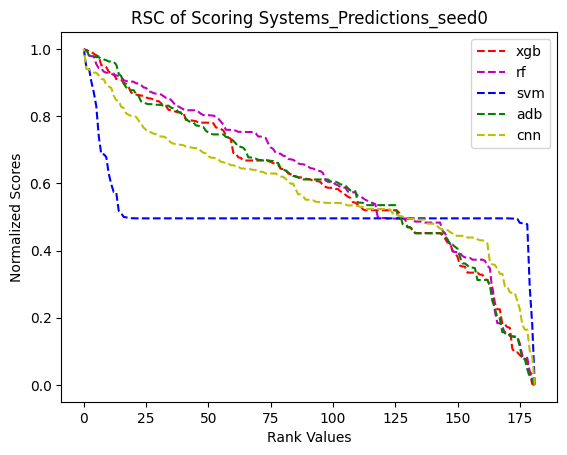

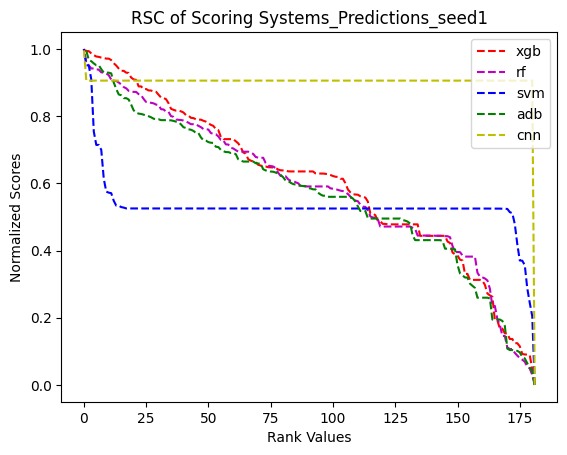

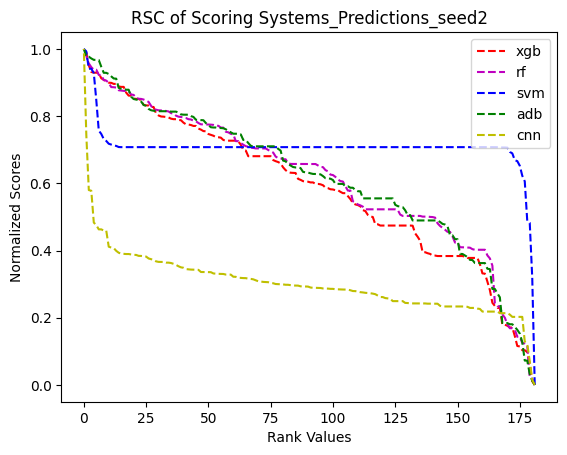

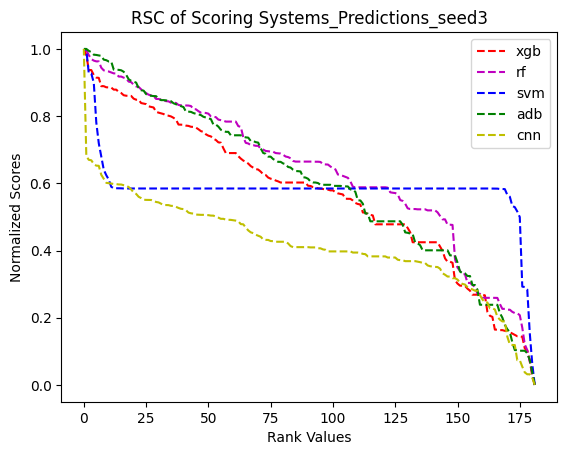

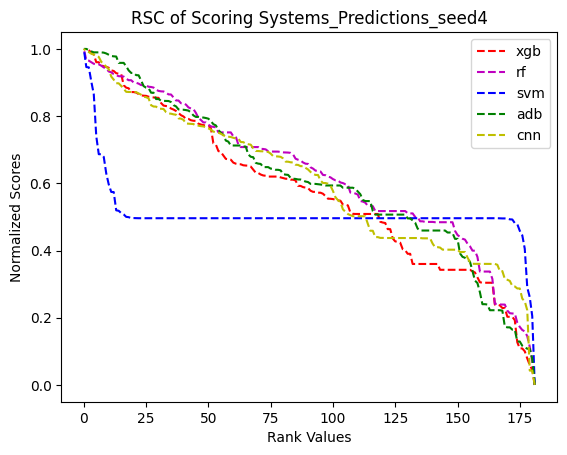

In [71]:
# RSC graphs
colors = ['r--', 'm--', 'b--', 'g--', 'y--']
ranks = np.flip(np.arange(len(predictions_xgb[0])))

for seed in range(len(globals()['predictions_list_%s' % sys])):
  for z in range(len(scoreSys)):
    globals()['line%s' % (z+1)] = plt.plot(ranks, np.sort(normalize(globals()['predictions_%s' % scoreSys[z]][seed])), colors[z], label = scoreSys[z])
    plt.legend(loc = 'upper right')
    plt.title('RSC of Scoring Systems_Predictions_seed%s' % seed)
    plt.xlabel('Rank Values')
    plt.ylabel('Normalized Scores')
  plt.show()


In [72]:
ds_score = [[] for _ in range(5)]

In [73]:
for sys in scoreSys:
  for seed in range(len(ds_score)):
    loc = scoreSys.index(sys)
    scoreSys.remove(sys)
    ds = 0
    for i in range(len(scoreSys)):
      ds += np.sum(np.square(normalize(np.sort(globals()['predictions_%s' % sys][seed]))-normalize(np.sort(globals()['predictions_%s' % scoreSys[i]][seed]))))
    ds = ds/len(scoreSys)
    scoreSys.insert(loc, sys)
    ds_score[seed].append(ds)

In [74]:
ds_score

[[2.494233934880361,
  2.9430901653084818,
  8.095466594642541,
  2.524556859557072,
  1.8927999569810066],
 [8.931853674212167,
  8.800931859618226,
  12.485567990960071,
  9.142807842487015,
  27.3236132116641],
 [7.3083100720470835,
  7.456084155465485,
  14.051501441952412,
  7.640775673498599,
  23.30989196477111],
 [3.5455221255589975,
  4.717026795620183,
  7.408994362781312,
  4.459988748365937,
  8.101432211444804],
 [2.5362811030188697,
  2.6940274102641784,
  8.674953055008267,
  2.7639413878910397,
  2.3218363759846667]]

In [75]:
ds_rank = np.reciprocal(ds_score)

In [76]:
def mean_absolute_error(y_pred, y_test):
  res = np.mean(np.abs(y_pred - y_test))
  return res

In [77]:
ps_score = [[] for _ in range(5)]

In [78]:
for sys in scoreSys:
  for seed in range(len(ps_score)):
    ps = mean_absolute_error(globals()['predictions_%s' % sys][seed], y_test)
    ps_score[seed].append(ps)

In [79]:
def powerset(s):
    x = len(s)
    ls = []
    for i in range(1 << x):
        ls.append([s[j] for j in range(x) if (i & (1 << j))])
    return ls[1:]

models = powerset(scoreSys)

def myFunc(e):
  return len(e)

models.sort(key=myFunc)

models_list = []
for i in range(len(models)):
  if len(models[i]) == 1:
    models_list.append(models[i][0])
  elif len(models[i]) == 2:
    models_list.append(models[i][0]+'&'+models[i][1])
  elif len(models[i]) == 3:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2])
  elif len(models[i]) == 4:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2]+'&'+models[i][3])
  elif len(models[i]) == 5:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2]+'&'+models[i][3]+'&'+models[i][4])

# Perform average score combinations

In [80]:
avg_score_combine_seed1 = pd.DataFrame({'xgb':predictions_xgb[0], 'rf':predictions_rf[0], 'svm':predictions_svm[0], 'adb':predictions_adb[0], 'cnn':predictions_cnn[0]})
avg_score_combine_seed2 = pd.DataFrame({'xgb':predictions_xgb[1], 'rf':predictions_rf[1], 'svm':predictions_svm[1], 'adb':predictions_adb[1], 'cnn':predictions_cnn[1]})
avg_score_combine_seed3 = pd.DataFrame({'xgb':predictions_xgb[2], 'rf':predictions_rf[2], 'svm':predictions_svm[2], 'adb':predictions_adb[2], 'cnn':predictions_cnn[2]})
avg_score_combine_seed4 = pd.DataFrame({'xgb':predictions_xgb[3], 'rf':predictions_rf[3], 'svm':predictions_svm[3], 'adb':predictions_adb[3], 'cnn':predictions_cnn[3]})
avg_score_combine_seed5 = pd.DataFrame({'xgb':predictions_xgb[4], 'rf':predictions_rf[4], 'svm':predictions_svm[4], 'adb':predictions_adb[4], 'cnn':predictions_cnn[4]})

In [81]:
def avg_score_combine(models_list, single_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]) / 2
    elif len(j.split('&')) == 3:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]) / 3
    elif len(j.split('&')) == 4:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]+single_score[j.split('&')[3]]) / 4
    elif len(j.split('&')) == 5:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]+single_score[j.split('&')[3]]+single_score[j.split('&')[4]]) / 5

In [82]:
avg_score_combine(models_list, avg_score_combine_seed1)
avg_score_combine(models_list, avg_score_combine_seed2)
avg_score_combine(models_list, avg_score_combine_seed3)
avg_score_combine(models_list, avg_score_combine_seed4)
avg_score_combine(models_list, avg_score_combine_seed5)

# Perform average rank combinations

In [83]:
avg_rank_combine_seed1 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[0]), 'rf':score_to_rank(predictions_rf[0]), 'svm':score_to_rank(predictions_svm[0]), 'adb':score_to_rank(predictions_adb[0]), 'cnn':score_to_rank(predictions_cnn[0])})
avg_rank_combine_seed2 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[1]), 'rf':score_to_rank(predictions_rf[1]), 'svm':score_to_rank(predictions_svm[1]), 'adb':score_to_rank(predictions_adb[1]), 'cnn':score_to_rank(predictions_cnn[1])})
avg_rank_combine_seed3 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[2]), 'rf':score_to_rank(predictions_rf[2]), 'svm':score_to_rank(predictions_svm[2]), 'adb':score_to_rank(predictions_adb[2]), 'cnn':score_to_rank(predictions_cnn[2])})
avg_rank_combine_seed4 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[3]), 'rf':score_to_rank(predictions_rf[3]), 'svm':score_to_rank(predictions_svm[3]), 'adb':score_to_rank(predictions_adb[3]), 'cnn':score_to_rank(predictions_cnn[3])})
avg_rank_combine_seed5 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[4]), 'rf':score_to_rank(predictions_rf[4]), 'svm':score_to_rank(predictions_svm[4]), 'adb':score_to_rank(predictions_adb[4]), 'cnn':score_to_rank(predictions_cnn[4])})

In [84]:
def avg_rank_combine(models_list, single_rank):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]) / 2
    elif len(j.split('&')) == 3:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]) / 3
    elif len(j.split('&')) == 4:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]+single_rank[j.split('&')[3]]) / 4
    elif len(j.split('&')) == 5:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]+single_rank[j.split('&')[3]]+single_rank[j.split('&')[4]]) / 5

In [85]:
avg_rank_combine(models_list, avg_rank_combine_seed1)
avg_rank_combine(models_list, avg_rank_combine_seed2)
avg_rank_combine(models_list, avg_rank_combine_seed3)
avg_rank_combine(models_list, avg_rank_combine_seed4)
avg_rank_combine(models_list, avg_rank_combine_seed5)

# Perform weighted score combination by diversity strength

In [86]:
ds_score_combine_seed1 = pd.DataFrame()
ds_score_combine_seed2 = pd.DataFrame()
ds_score_combine_seed3 = pd.DataFrame()
ds_score_combine_seed4 = pd.DataFrame()
ds_score_combine_seed5 = pd.DataFrame()

In [87]:
def ds_score_combine(models_list, single_score, ds_score_combine, ds_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])]+single_score[j.split('&')[3]]*ds_score[scoreSys.index(j.split('&')[3])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])] + ds_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])]+single_score[j.split('&')[3]]*ds_score[scoreSys.index(j.split('&')[3])]+single_score[j.split('&')[4]]*ds_score[scoreSys.index(j.split('&')[4])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])] + ds_score[scoreSys.index(j.split('&')[3])] + ds_score[scoreSys.index(j.split('&')[4])])

In [88]:
ds_score_combine(models_list, avg_score_combine_seed1, ds_score_combine_seed1, ds_score[0])
ds_score_combine(models_list, avg_score_combine_seed2, ds_score_combine_seed2, ds_score[1])
ds_score_combine(models_list, avg_score_combine_seed3, ds_score_combine_seed3, ds_score[2])
ds_score_combine(models_list, avg_score_combine_seed4, ds_score_combine_seed4, ds_score[3])
ds_score_combine(models_list, avg_score_combine_seed5, ds_score_combine_seed5, ds_score[4])

# Perform weighted rank combination by diversity strength

In [89]:
ds_rank_combine_seed1 = pd.DataFrame()
ds_rank_combine_seed2 = pd.DataFrame()
ds_rank_combine_seed3 = pd.DataFrame()
ds_rank_combine_seed4 = pd.DataFrame()
ds_rank_combine_seed5 = pd.DataFrame()

In [90]:
def ds_rank_combine(models_list, single_rank, ds_rank_combine, ds_rank):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])]+single_rank[j.split('&')[3]]*ds_rank[scoreSys.index(j.split('&')[3])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])] + ds_rank[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])]+single_rank[j.split('&')[3]]*ds_rank[scoreSys.index(j.split('&')[3])]+single_rank[j.split('&')[4]]*ds_rank[scoreSys.index(j.split('&')[4])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])] + ds_rank[scoreSys.index(j.split('&')[3])] + ds_rank[scoreSys.index(j.split('&')[4])])

In [91]:
ds_rank_combine(models_list, avg_rank_combine_seed1, ds_rank_combine_seed1, ds_rank[0])
ds_rank_combine(models_list, avg_rank_combine_seed2, ds_rank_combine_seed2, ds_rank[1])
ds_rank_combine(models_list, avg_rank_combine_seed3, ds_rank_combine_seed3, ds_rank[2])
ds_rank_combine(models_list, avg_rank_combine_seed4, ds_rank_combine_seed4, ds_rank[3])
ds_rank_combine(models_list, avg_rank_combine_seed5, ds_rank_combine_seed5, ds_rank[4])

# Perform weighted score combination by performance strength (MAE)

In [92]:
ps_score_combine_seed1 = pd.DataFrame()
ps_score_combine_seed2 = pd.DataFrame()
ps_score_combine_seed3 = pd.DataFrame()
ps_score_combine_seed4 = pd.DataFrame()
ps_score_combine_seed5 = pd.DataFrame()

In [93]:
def ps_score_combine(models_list, single_score, ps_score_combine, ps_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])])+single_score[j.split('&')[3]]*(1 / ps_score[scoreSys.index(j.split('&')[3])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])])+single_score[j.split('&')[3]]*(1 / ps_score[scoreSys.index(j.split('&')[3])])+single_score[j.split('&')[4]]*(1 / ps_score[scoreSys.index(j.split('&')[4])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])] + 1 / ps_score[scoreSys.index(j.split('&')[3])] + 1 / ps_score[scoreSys.index(j.split('&')[4])])

In [94]:
ps_score_combine(models_list, avg_score_combine_seed1, ps_score_combine_seed1, ps_score[0])
ps_score_combine(models_list, avg_score_combine_seed2, ps_score_combine_seed2, ps_score[1])
ps_score_combine(models_list, avg_score_combine_seed3, ps_score_combine_seed3, ps_score[2])
ps_score_combine(models_list, avg_score_combine_seed4, ps_score_combine_seed4, ps_score[3])
ps_score_combine(models_list, avg_score_combine_seed5, ps_score_combine_seed5, ps_score[4])

# Perform weighted rank combination by performance strength

In [95]:
ps_rank_combine_seed1 = pd.DataFrame()
ps_rank_combine_seed2 = pd.DataFrame()
ps_rank_combine_seed3 = pd.DataFrame()
ps_rank_combine_seed4 = pd.DataFrame()
ps_rank_combine_seed5 = pd.DataFrame()

In [96]:
def ps_rank_combine(models_list, single_rank, ps_rank_combine, ps_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])])+single_rank[j.split('&')[3]]*(ps_score[scoreSys.index(j.split('&')[3])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])])+single_rank[j.split('&')[3]]*(ps_score[scoreSys.index(j.split('&')[3])])+single_rank[j.split('&')[4]]*(ps_score[scoreSys.index(j.split('&')[4])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])] + ps_score[scoreSys.index(j.split('&')[4])])

In [97]:
ps_rank_combine(models_list, avg_rank_combine_seed1, ps_rank_combine_seed1, ps_score[0])
ps_rank_combine(models_list, avg_rank_combine_seed2, ps_rank_combine_seed2, ps_score[1])
ps_rank_combine(models_list, avg_rank_combine_seed3, ps_rank_combine_seed3, ps_score[2])
ps_rank_combine(models_list, avg_rank_combine_seed4, ps_rank_combine_seed4, ps_score[3])
ps_rank_combine(models_list, avg_rank_combine_seed5, ps_rank_combine_seed5, ps_score[4])

In [98]:
avg_rank_combine_seed1.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed2.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed3.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed4.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed5.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)

# Calculate MAE

In [99]:
score_combine_list = np.hstack((np.array(avg_score_combine_seed1.columns), np.array(ds_score_combine_seed1.columns), np.array(ps_score_combine_seed1.columns)))
MAE = pd.DataFrame(index = score_combine_list)
for i in range(1, 6):
  mae_avg, mae_ds, mae_ps = [], [], []
  for col in globals()['avg_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['avg_score_combine_seed%s' %i][col]), y_test)
    mae_avg.append(mae)
  for col in globals()['ds_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['ds_score_combine_seed%s' %i][col]), y_test)
    mae_ds.append(mae)
  for col in globals()['ps_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['ps_score_combine_seed%s' %i][col]), y_test)
    mae_ps.append(mae)
  MAE['seed'+str(i)] = np.hstack((mae_avg, mae_ds, mae_ps))

In [100]:
pd.set_option('display.max_rows', None)

In [101]:
MAE['avg_MAE'] = MAE.mean(axis=1)

In [102]:
MAE.sort_values(by='avg_MAE')

,seed1,seed2,seed3,seed4,seed5,avg_MAE
xgb&adb_ps,0.290702,0.277400,0.287429,0.280971,0.266213,0.280543
xgb&adb,0.290726,0.277731,0.287564,0.281352,0.266872,0.280849
xgb&adb_ds,0.290707,0.277860,0.287702,0.282589,0.267934,0.281358
xgb,0.300557,0.273711,0.286895,0.278695,0.280546,0.284081
xgb&rf&adb_ps,0.295593,0.279419,0.293082,0.282964,0.272147,0.284641
xgb&rf_ps,0.303666,0.277677,0.293579,0.285357,0.264949,0.285046
xgb&rf&adb,0.295929,0.279750,0.293622,0.283228,0.272957,0.285097
xgb&rf,0.303932,0.277939,0.294273,0.285859,0.266122,0.285625
xgb&rf&adb_ds,0.296900,0.279786,0.293751,0.284198,0.273769,0.285681
xgb&rf_ds,0.304793,0.277873,0.294425,0.287723,0.266867,0.286336
